<a href="https://colab.research.google.com/github/aryarajat/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <B> Project Title: Mobile Price Range Prediction

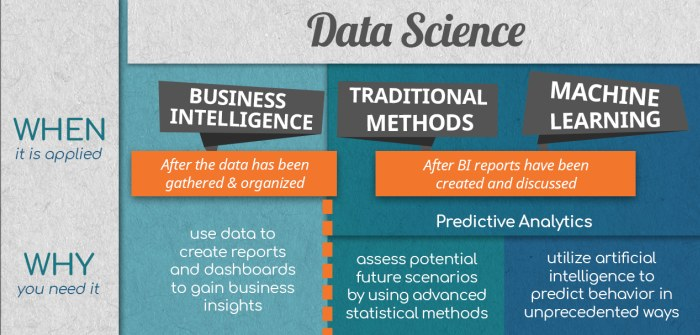

## <B>Probelem Description </B>
In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

## **Data Description**
* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not

* Fc - Front Camera mega pixels

* Four_g - Has 4G or not

* Int_memory - Internal Memory in Gigabytes


* M_dep - Mobile Depth in cm

* Mobile_wt - Weight of mobile phone

* N_cores - Number of cores of processor

* Pc - Primary Camera mega pixels

* Px_height - Pixel Resolution Height

* Px_width - Pixel Resolution Width

* Ram - Random Access Memory in Mega Bytes

* Sc_h - Screen Height of mobile in cm

* Sc_w - Screen Width of mobile in cm

* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost),2(high cost) and 3(very high cost).


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
mobile_df=pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [3]:
# First look of the dataset
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Take a look of last 5 observation of our dataset
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
# Checking the shape of the dataframe
mobile_df.shape

(2000, 21)

In [6]:
# Columns name
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Information about the dataset
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on a dataset( import from CSV, Jason, and Html files) to summarize their main characteristics, often with visual methods and check assumptions with the help of summary statistics and graphical representations. EDA is used for analyzing what the data can tell us before the modeling or by applying any set of instructions/code. When you are working with the datasets, it is not easy to determine the important characteristics of the data by looking at the column of numbers or a whole spreadsheet/dataset. It may be tedious, boring, and/or overwhelming to determine experiences by seeing plain numbers. . Exploratory data analysis techniques have been devised as an aid in this situation.

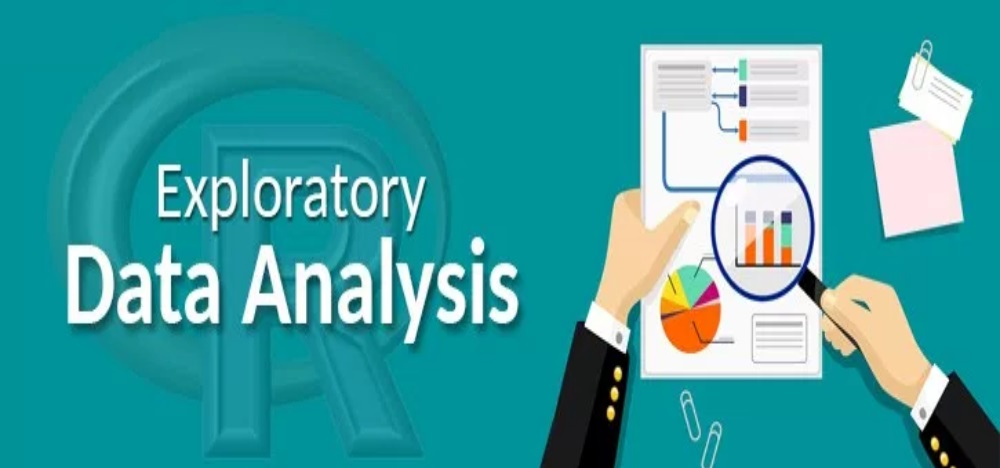

In [8]:
# Finding out the various statistics for all the columns of the dataset
mobile_df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# Checking the null values of the given dataset
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Given, dataset has no null values.**

In [10]:
# Cheking the duplicate observations
mobile_df.duplicated().sum()

0

**There is no duplicate observation present in our dataset.**

### **Correlation Matrix:**
A Correlation matrix describes correlation among M variables. It is a square symmetrical MxM matrix with the (ij)th element equal to the correlation coefficient r_ij between the (i)th and the (j)th variable. The diagonal elements (correlations of variables with themselves) are always equal to 1.00.

In [11]:
# Here we find the correlatoin matrix 
mobile_df.corr()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


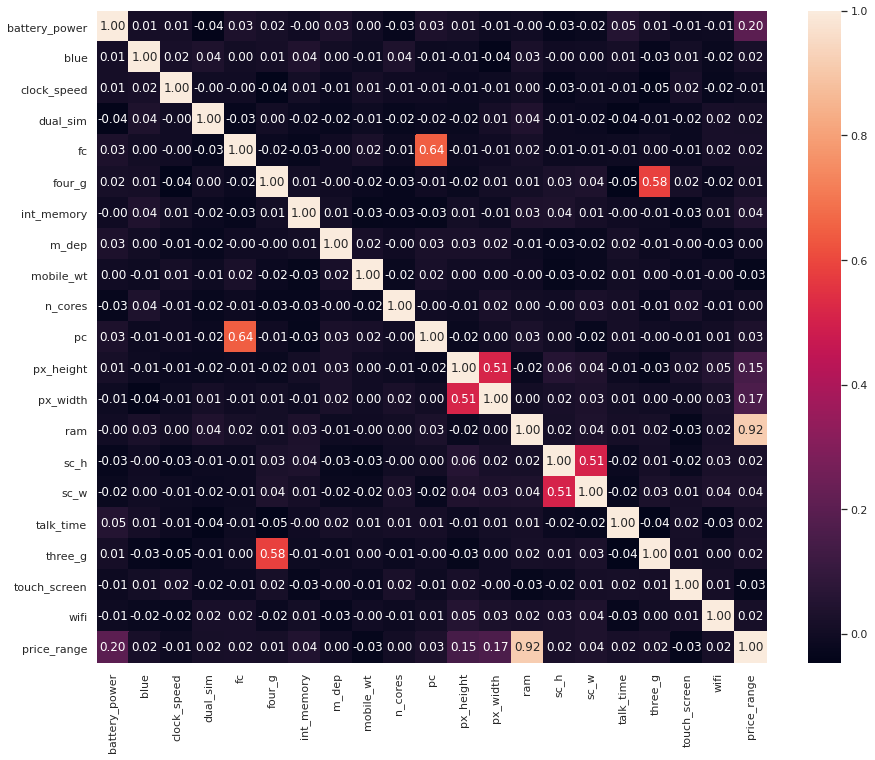

In [12]:
# Plot the heatmap for the above correlation matrix
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(mobile_df.corr(), annot=True,fmt=".2f")


### **Observation:**


*   Feature variable Ram is highly correlated with the dependent variable. The variable Ram has more impact on the dependent variable as compare to other variables.
*   The independent variable Front Camera and Primary camera are moderately correlated with each other. Similarly, 3G and 4G are also moderately correlated with each other.
* Screen width and screen height are also moderately correlated with each other. Similarly, pixel width and pixel height are moderately correlated with each other.
* We can see that the except ram the other variables battery_power, px_height, px_width also have some impact on the target variable.



In [13]:
# Check the mobile counts for the price range
mobile_df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

## **Distribution of Price Range**

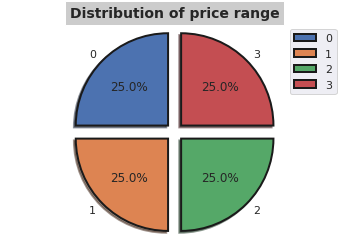

In [14]:
# Distribution of price range using the pie chart
plt.figure(figsize=(6,4))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["0",'1',"2","3"]
myexplode = [0.1, 0.1, 0.1, 0.1]
values=mobile_df['price_range'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90, 
        wedgeprops = wedgeprops, explode=myexplode)
plt.title('Distribution of price range', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

### **Observations:**
All the price ranges have the same number of mobiles.

## **Touchscreen**

In [15]:
# Analyze the Touch screen variable
mobile_df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

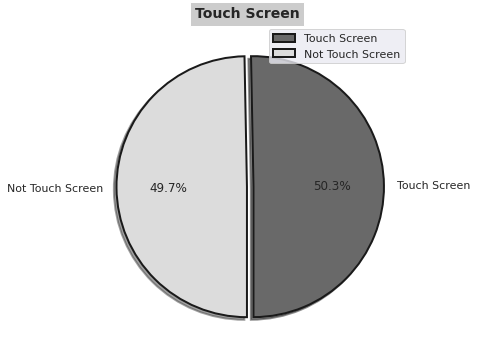

In [16]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["Touch Screen",'Not Touch Screen']
values = mobile_df['touch_screen'].value_counts().values


# Ploting the graph

myexplode = [0.05, 0]
colors = ['dimgray', 'gainsboro']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=270,
       colors=colors, explode = myexplode,wedgeprops = wedgeprops)
plt.title('Touch Screen', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **Observation:**


*  The quantity of touch-screen cellphones is nearly equal to the number of non-touch-screen phones.
* Out of the 2000 phones, 1006 have touch screens.



## **Relation between the Touchscreen and the Price Range**

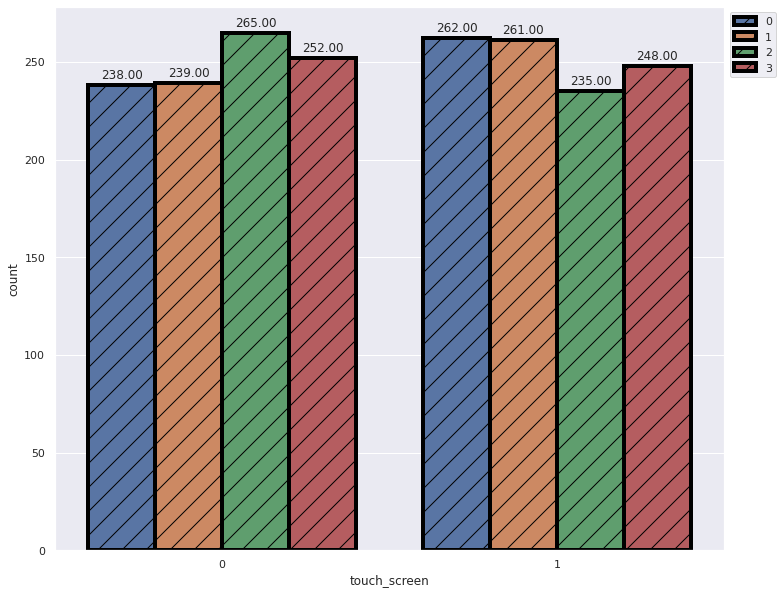

In [17]:
# Plotting the graph

plt.figure(figsize=(12,10))
ax=sns.countplot('touch_screen',data=mobile_df,lw=4, ec='black',
                 hue='price_range', hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

### **Observations:**


*   We can see from the graph that the low-cost category has the most touchscreen phones.
*   The number of touch screen mobiles in the high-cost category is the lowest.
*  We plotted the number of touch screen and non touch screen devices. We can observe from this plot that the total number of touch screen and non touch screen devices is evenly divided, indicating that we cannot predict price based on this attribute.



## **The number of phones that have Dual-Sim feature**

In [18]:
# Analyze the Dual Sim variable
mobile_df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

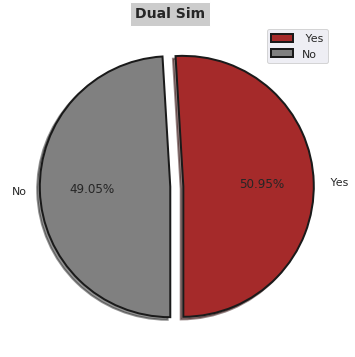

In [19]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Yes",'No']
values = mobile_df['dual_sim'].value_counts().values

# Ploting the graph
myexplode = [0.1, 0]
colors = ['brown', 'grey']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Dual Sim', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()


### **Observation:**


*  The quantity of dual sim cellphones is nearly equal to the number of single sim cellphones.
* Out of the 2000 phones, 1019 have dual sim feature.




## **Relation between the Dual Sim and the Price Range**

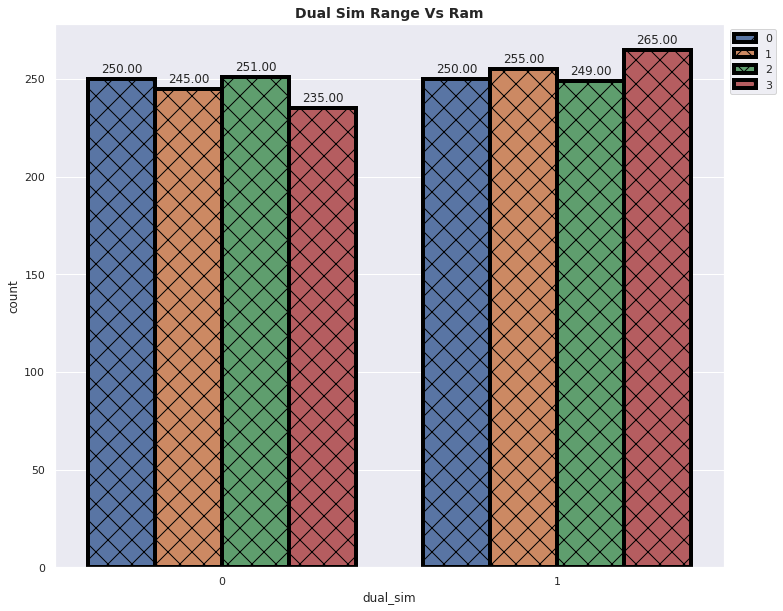

In [20]:
# Plotting the graph

plt.figure(figsize=(12,10))
ax=sns.countplot('dual_sim',data=mobile_df,lw=4, ec='black',hue='price_range',hatch='x')
plt.title('Dual Sim Range Vs Ram', fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

### **Observations:**


*   From the above countplot, we can see that the very high-cost category has the most dual sim phones. 
*   The number of dual sim phones in the high cost category is the lowest.

*  We plotted the number of dual sim and single devices. We can observe from this plot that the total number of dual sim and single devices is evenly divided, indicating that we cannot predict price based on this attribute.


## **Relation between RAM & Price Range**

Text(0.5, 1.0, 'Price Range Vs Ram')

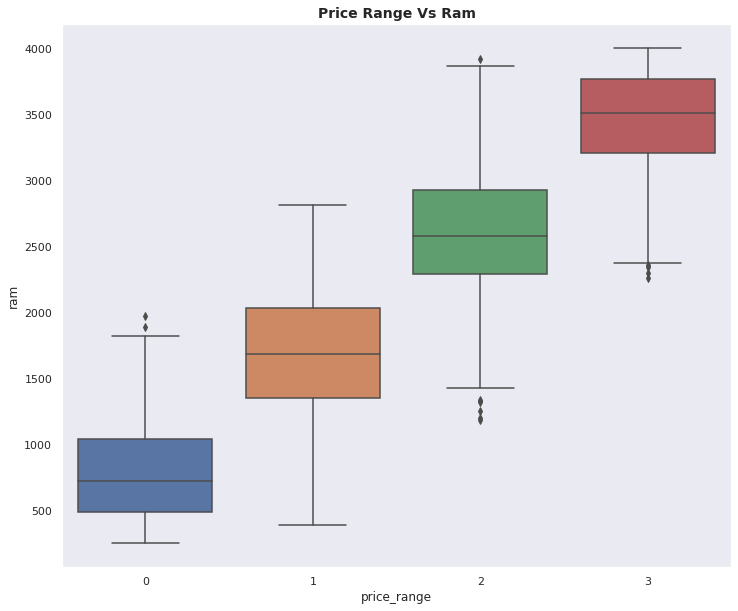

In [21]:
# Now, we check ram affect on the price of the mobile
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.boxplot(y="ram", x="price_range", data=mobile_df)
plt.title('Price Range Vs Ram', fontsize=14, fontweight="bold")

### **Observation:**

This is a positive relationship, with increase in RAM, price too increases.
There are 4 types of price range:


> Type 1(low cost): RAM ranges between 216 to 1974 megabytes

> Type 2(medium cost): RAM ranges between 387 to 2811 megabytes

> Type 3(high cost): RAM ranges between 1185 to 3916 megabytes

> Type 4(very high cost): RAM ranges between 2255 to 4000 megabytes




## **Relation between Price Range and Battery Power**

Text(0.5, 1.0, 'Battery Power Vs Price Range')

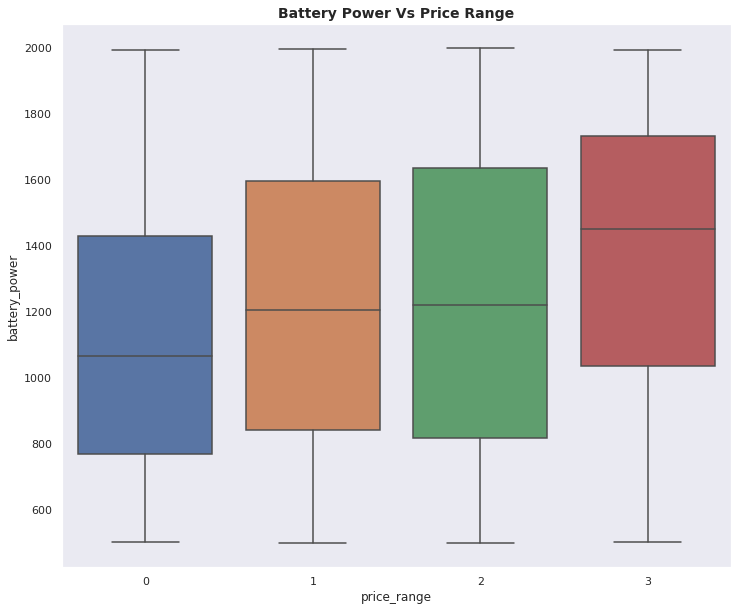

In [22]:
# Now, we check battery affect on the price of the mobile
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.boxplot(y="battery_power", x="price_range", data=mobile_df)
plt.title('Battery Power Vs Price Range', fontsize=14, fontweight="bold")

### **Observation:**


*   We can observe from this Boxplot of battery power vs. price range that price range gradually increases as battery power increases. As a result, we can claim that battery power has a positive influence on prediction
*   Average battery power is near about 1200 mah.



## **Relationship between the Price Range and Pixel Height/ Width**

No handles with labels found to put in legend.


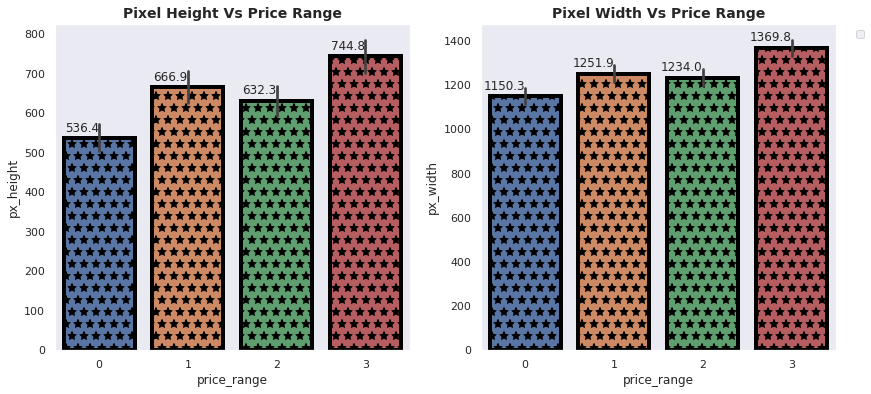

In [23]:
# Here, we plot the bar plot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(x='price_range',y='px_height', data = mobile_df,lw=4,
               ec='black',hatch='*')
plt.title("Pixel Height Vs Price Range", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right' , va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Second plot
plt.subplot(1,2,2)
ax1=sns.barplot(x='price_range',y='px_width', data=mobile_df,lw=4, 
                ec='black',hatch='*')
plt.title("Pixel Width Vs Price Range", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

### Observation:

*   From the above bar plot, we can see that the average pixel height and width are highest for the price range 3(very high cost).
*   Low-cost phones have smaller average pixel width and pixel height.
*  We can observe from this histogram that pixel height and pixel width are roughly equal in relevance when it comes to model development for prediction.




## **Phones that support 3G**

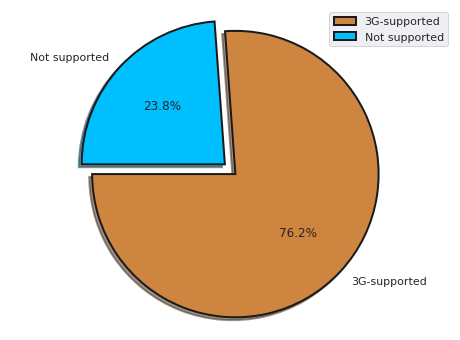

In [24]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["3G-supported",'Not supported']
values = mobile_df['three_g'].value_counts().values

# Ploting the graph

myexplode = [0.1, 0]
colors = ['peru', 'deepskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)
plt.axis('equal')
plt.legend()
plt.show()

## **Ploting the relationship between Price Range and 3G**

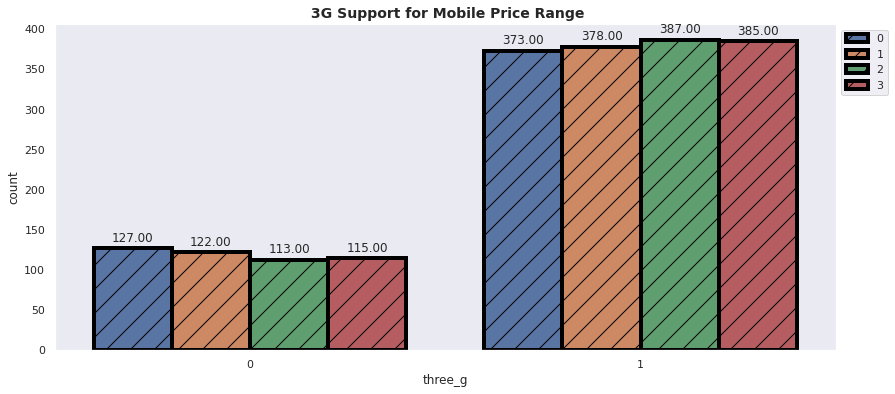

In [25]:
# Here, we plot count plot for the 3G mobiles
plt.figure(figsize=(14,6))
ax=sns.countplot(mobile_df['three_g'],data=mobile_df, hue='price_range',lw=4, ec='black', hatch='/')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title(" 3G Support for Mobile Price Range", fontsize=14, fontweight="bold")

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

### Observations:


*   According to the graph, the greatest number of 3G cellphones are in the high cost price bracket. 
*   The number of 3G phones in the low-cost category is less than in other categories.
*We can observe from the plot that varible three_g has little influence on price range.






## **Phones that supports 4G**

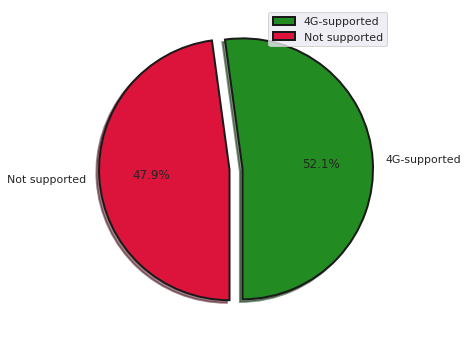

In [26]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["4G-supported",'Not supported']
values = mobile_df['four_g'].value_counts().values

# Ploting the graph

myexplode = [0.1, 0]
colors = ['forestgreen', 'crimson']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=270,
       colors=colors, explode = myexplode,wedgeprops = wedgeprops)
plt.legend()
plt.show()

## **Ploting the relationship between Price Range and 4G**

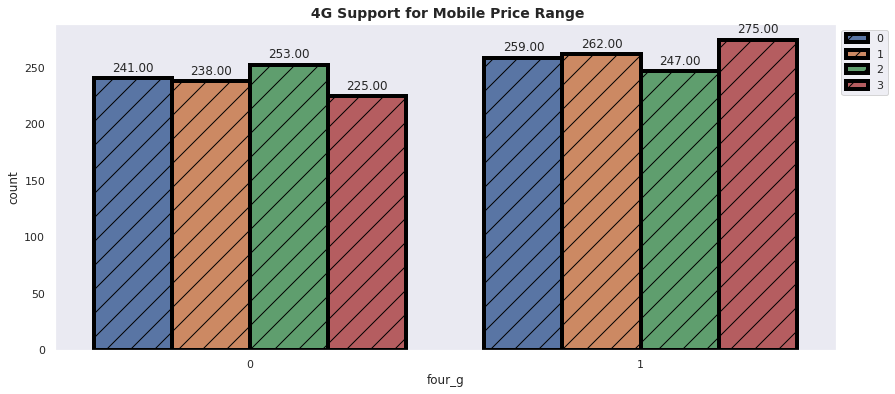

In [27]:
# Here, we plot count plot for the 4G mobiles
plt.figure(figsize=(14,6))
splot=sns.countplot(mobile_df['four_g'],data=mobile_df, hue='price_range',lw=4, ec='black', hatch='/')
plt.title(" 4G Support for Mobile Price Range", fontsize=14, fontweight="bold")
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

### Observations:
*   According to the graph, the greatest number of 4G cellphones are in the very high cost price bracket. 
*   The number of 4G phones in the high-cost category is less than in other categories.
*We can observe from the plot that varible four_g has little influence on price range.



# **Plotting the relationship between the Price Range and Internal Memory**

<Figure size 1080x1080 with 0 Axes>

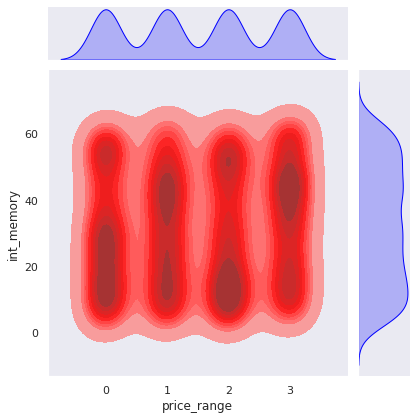

In [28]:
# Here, we plot the line plot
plt.figure(figsize=(15,15))
sns.jointplot(x='price_range',y='int_memory',data=mobile_df,kind='kde',
              color='red',shade=True, marginal_kws={'shade':True,'color':'blue'})


### **Observations:**
We can see from this jointplot of int memory and price range that price range does not steadily grow as internal memory increases.
As a result, we can conclude that int memory has little influence on prediction.

## **Wifi**

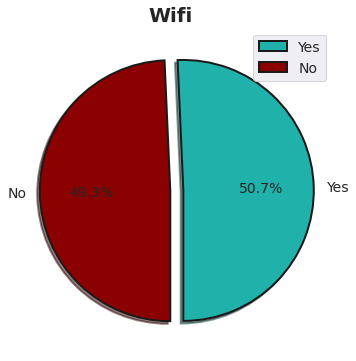

In [29]:
# Parameters for the graph
plt.figure(figsize = (8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["Yes" ,'No']
values = mobile_df['wifi'].value_counts().values

# Ploting the graph

myexplode = [0.1, 0]
colors = ['lightseagreen', 'darkred']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,startangle=270,
       colors=colors, wedgeprops = wedgeprops,explode = myexplode,textprops = {"fontsize":14})
plt.title("Wifi", bbox={'facecolor':'1'},fontsize=20 ,fontweight="bold")
plt.legend(fontsize=14)
plt.show()

### **Observation:**


*  The number of cellphones with wifi is roughly equal to the number of cellphones without wifi.
* There are 1014 wifi-enabled phones among the 2000.

## **Relation between the price range and wifi**

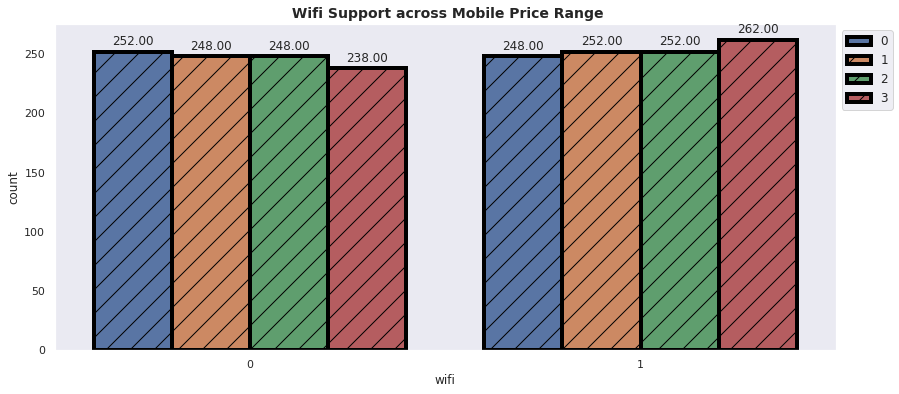

In [30]:
# Here, we plot count plot for the wifi 
plt.figure(figsize=(14,6))
splot=sns.countplot(mobile_df['wifi'],data=mobile_df, hue='price_range',lw=4, ec='black', hatch='/')
plt.title(" Wifi Support across Mobile Price Range", fontsize=14, fontweight="bold")
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=12)

### **Observations:**

* The biggest number of wifi-enabled mobile phones are found in the very high-cost category.

* The low-cost category has the lowest number of wifi enabled mobile phones.

*  The number of wifi enabled and non-wifi devices was plotted. This plot shows that the total number of wifi enabled and non-wifi devices is uniformly distributed, implying that we cannot estimate price based on this feature.

## **Bluetooth**

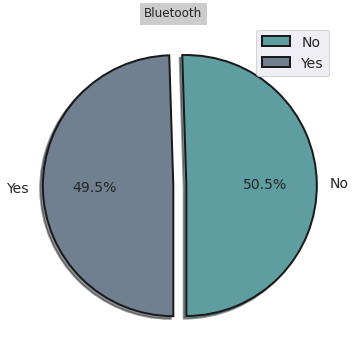

In [31]:
# Parameters for the graph
plt.figure(figsize = (8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = ["No" ,'Yes']
values = mobile_df['blue'].value_counts().values

# Ploting the graph

myexplode = [0.1, 0]
colors = ['cadetblue', 'slategray']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=270,
       colors=colors, wedgeprops = wedgeprops,explode = myexplode,textprops = {"fontsize":14})
plt.title("Bluetooth", bbox={'facecolor':'0.8', 'pad':5})
plt.legend(fontsize=14)
plt.show()

### **Observation:**


*  The number of cellphones with bluetooth is roughly equal to the number of cellphones without bluetooth.
* There are 1010 bluetooth-enabled phones among the 2000.

## **Ploting the relationship between the price range and Bluetooth**

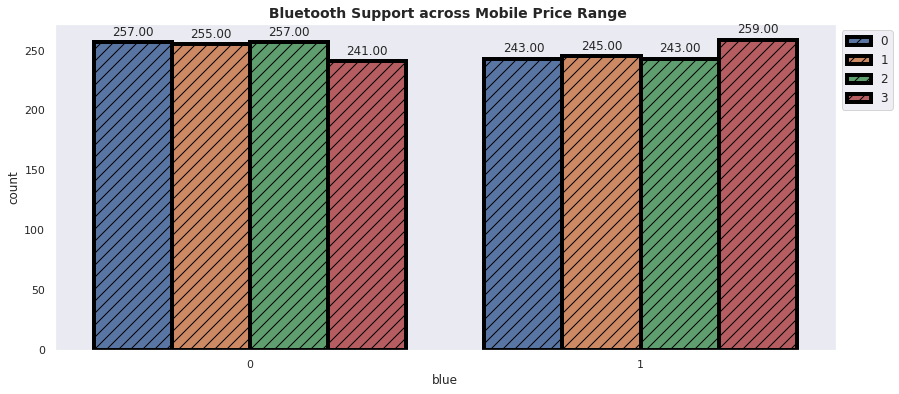

In [32]:
# Here, we plot count plot for the Bluetooth 
plt.figure(figsize=(14,6))
splot=sns.countplot(mobile_df['blue'],data=mobile_df, hue='price_range',lw=4, ec='black', hatch='//')
plt.title(" Bluetooth Support across Mobile Price Range", fontsize=14, fontweight="bold")
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=12)

### **Observations:**

* The biggest number of bluetooth-enabled mobile phones are found in the very high-cost category.

* The low-cost category has the lowest number of bluetooth-enabled mobile phones.

*  The number of Bluetooth enabled and non-Bluetooth devices was plotted. This plot shows that the total number of Bluetooth enabled and non-Bluetooth devices is uniformly distributed, implying that we cannot estimate price based on this feature.

## **Ploting the relationship between Screen width/ height and price range**

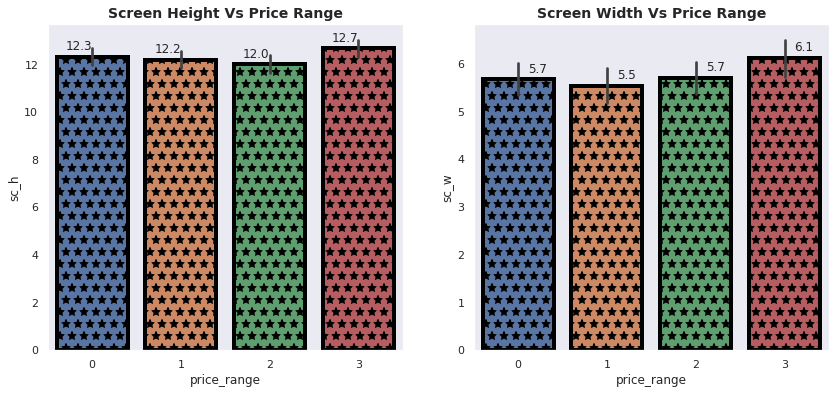

In [33]:
# Here, we plot the bar plot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(x='price_range',y='sc_h', data = mobile_df,lw=4,
               ec='black',hatch='*')
plt.title("Screen Height Vs Price Range", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Second plot
plt.subplot(1,2,2)
ax1=sns.barplot(x='price_range',y='sc_w', data=mobile_df,lw=4, 
                ec='black',hatch='*')
plt.title("Screen Width Vs Price Range", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'left', va = 'center', xytext = (10, 10), textcoords = 'offset points')


### **Observations:**
*   From the above bar plot, we can see that the average screen height and width are highest for the very high-cost price range.
*   High-cost phones have smaller average pixel width and pixel height.

## **Number of Phones vs Camera megapixels of front and primary camera**

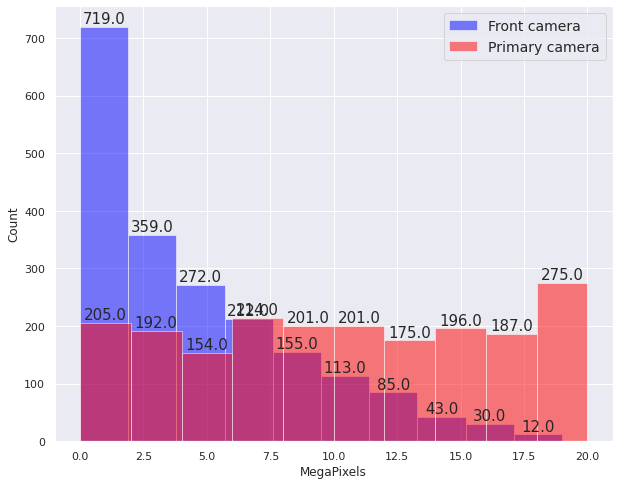

In [34]:
# Here we plot the histogram for the front camera and primary camera
plt.figure(figsize=(10,8))
ax=mobile_df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend(fontsize=14)
plt.xlabel('MegaPixels')
plt.ylabel('Count')

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


### Observations:


*   From the above histogram, it is clear that the distribution for the front camera is right-skewed.
*   Distribution for the Primary camera is nearly uniform.
*   From the graph, we can see that the Front Camera has more impact on a price range as compared to the primary camera.



# **Pointplot**
A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. Point plot shows only mean values and error rate surrounding those mean values. They are not very much informative but are easy to find the change in a variable based on different categories.

## **Relation between the Talk-Time and Price Range**

Text(0.5, 1.0, 'Talk time vs Price range')

<Figure size 720x576 with 0 Axes>

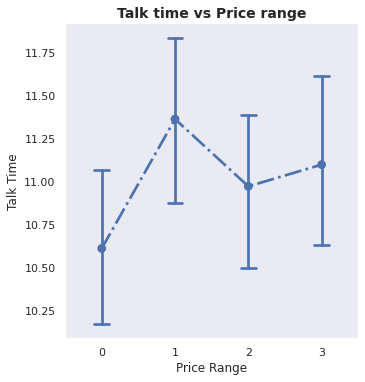

In [35]:
# Ploting the graph
plt.figure(figsize=(10,8))
sns.catplot( x="price_range",y="talk_time",kind='point', data=mobile_df, 
            linestyles = '-.',capsize=.2)
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.title("Talk time vs Price range", fontsize=14, fontweight='bold')

### **Observation:**
We can see from this Pointplot of chat time vs. price range that the price range does not grow steadily as the talk time increases. As a result, we can conclude that talk time has little impact on prediction.

## **Relation between the Clock Speed and Price Range**

Text(0.5, 1.0, 'Talk time vs Price range')

<Figure size 720x576 with 0 Axes>

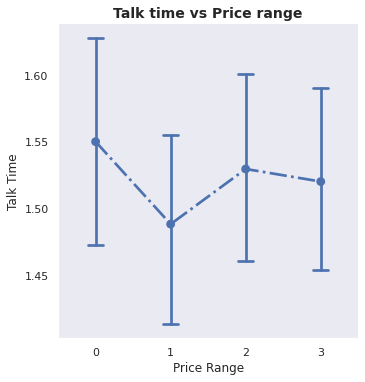

In [36]:
# Ploting the graph
plt.figure(figsize=(10,8))
sns.catplot( x="price_range",y="clock_speed",kind='point', data=mobile_df, 
            linestyles = '-.',capsize=.2)
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.title("Talk time vs Price range", fontsize=14, fontweight='bold')

## Observation: 
From this Point plot of clock speed versus price range, we can observe that price range does not progressively increase as clock speed increases. As a result, we can conclude that clock speed had little impact on the prediction.

## **The Number of Cores**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Counts for the number of cores')

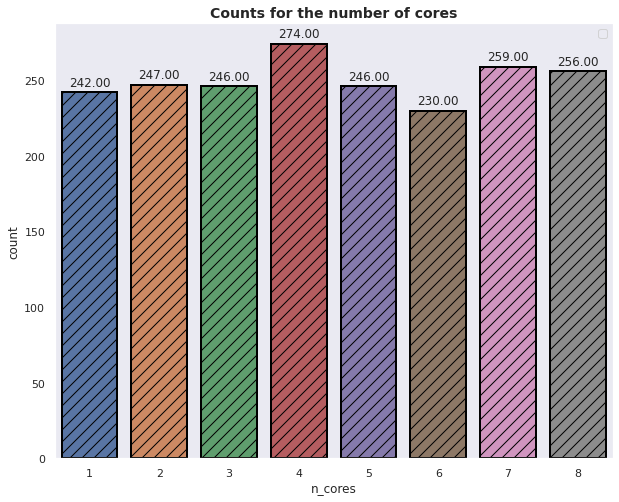

In [37]:
# Here we plot the countplot for the number of cores
plt.figure(figsize=(10,8))
ax=sns.countplot(x='n_cores',data= mobile_df, ec='black', linewidth=2,hatch='//')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend()
plt.title("Counts for the number of cores", fontsize=14, fontweight='bold')

### **Observations:**


*   According to the above countplot, the quadcore(4 cores) category has the most mobiles.
*   In comparison to other processors, the number of mobiles that use hexacore(6 core) CPUs is lower.



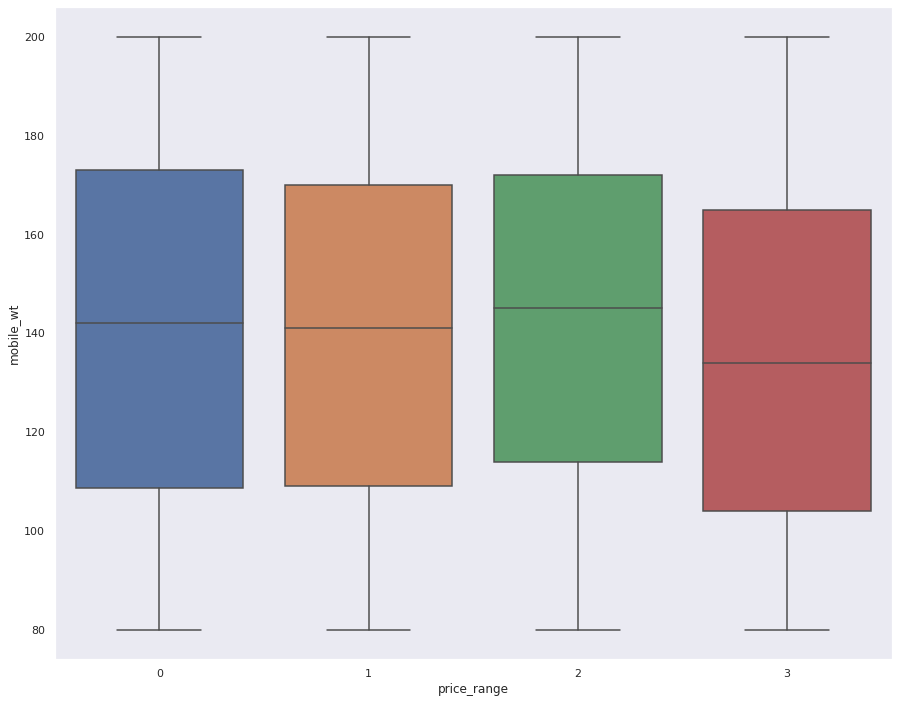

In [38]:
sns.boxplot(y='mobile_wt',x='price_range',data=mobile_df)

### Observations:

* According to the boxplot above, the very high price group contains a lighter phone than the other pricing categories.

* The average weight of a mobile phone is close to 140 g.


# **Data Prepration**

## **Feature Selection**

**Feature selection** is the process of reducing the number of input variables when developing a predictive model.

In fact, it is almost never the case that all of the variables in a dataset are relevant for developing a machine learning model. Adding duplicate variables affects the model's generalization potential and may also reduce a classifier's accuracy rate. Furthermore, adding more variables to a model enhances the model's total complexity.

It is advisable to limit the number of input variables to reduce modelling computational costs and, in situations, increase model performance.

In [39]:
X = mobile_df.iloc[:,0:20]  #independent columns
y = mobile_df.iloc[:,-1] 

In [40]:
# Select best 10 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [41]:
# Here we consider only six feature
# Data for the Independent variable
X=mobile_df[['ram', 'battery_power', 'px_height', 'px_width','mobile_wt','int_memory']]

# Data for dependent variable
y=mobile_df['price_range']

## **Train Test Split**

In [42]:
# Appying the train test split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


## **Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Applying the Models**


1.   KNeighborsClassifier

2.   Support Vector Machine (SVM)

3.   Gradient Boosting

4.   XGBOOST





## **Fitting the KNeighborsClassifier**

In [44]:
# Importing different evalution matrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Import Grid Search for Hyperparamter tunning
from sklearn.model_selection import GridSearchCV

In [46]:
# Applying the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [47]:
# Training Score
train_score=knn.score(X_train,y_train)
print('KNeighborsClassifier training score:',train_score)

KNeighborsClassifier training score: 0.873125


In [48]:
# Predictions on the train and test data
y_test_knn=knn.predict(X_test)
y_train_knn=knn.predict(X_train)

In [49]:
# Printing the predicted output
print(y_test_knn)

[3 2 0 2 3 1 0 0 1 0 3 0 0 1 3 3 2 1 2 2 1 0 3 2 2 1 1 0 2 1 0 2 0 2 1 3 0
 3 1 0 2 1 0 1 3 0 2 3 2 2 0 3 0 2 0 3 3 0 3 1 2 1 3 1 0 0 0 1 3 3 3 1 0 1
 2 0 2 2 1 2 3 2 2 0 0 1 0 0 0 1 0 2 2 3 0 2 0 0 2 2 3 1 0 0 2 3 2 2 1 1 0
 1 3 1 3 2 2 2 2 2 2 0 3 0 2 3 3 1 2 3 2 0 0 1 2 1 1 3 2 3 3 3 2 1 3 2 1 1
 0 1 3 0 1 1 3 3 3 2 0 2 1 1 0 2 1 2 2 1 3 0 1 0 2 3 2 1 1 3 0 3 2 2 2 3 0
 1 0 1 0 0 0 2 1 1 3 0 2 3 1 0 2 2 0 3 0 0 3 1 1 1 0 2 1 0 0 3 1 2 3 3 0 3
 2 1 3 1 1 2 0 0 0 1 0 0 0 0 0 2 2 3 2 3 0 1 2 2 2 3 3 2 1 0 3 3 2 3 2 1 2
 2 2 2 2 1 0 0 2 1 2 2 2 0 0 1 0 3 2 2 3 1 3 2 2 2 1 0 1 1 1 3 1 0 3 1 1 1
 0 1 1 1 1 3 0 3 2 3 1 2 1 1 0 0 2 3 3 2 3 1 0 2 0 2 3 3 0 0 3 2 0 1 0 0 0
 0 0 0 2 1 3 0 1 2 2 3 3 0 2 1 2 3 2 0 2 2 1 0 0 1 2 2 3 0 0 0 3 3 3 1 2 1
 2 0 0 2 1 0 0 0 3 1 1 1 0 3 0 3 2 3 1 2 0 2 2 1 0 1 2 1 2 2]


In [50]:
# Create confusion matrix
pd.crosstab(y_test, y_test_knn, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,94,6,0,0
1,15,70,15,0
2,0,20,73,7
3,0,0,23,77


In [51]:
# Printing the accuracy score
test_accu1=accuracy_score(y_test,y_test_knn)
train_accu1=accuracy_score(y_train,y_train_knn)


print('Train Accuracy Score:',train_accu1)
print('Test Accuracy Score:',test_accu1)

Train Accuracy Score: 0.873125
Test Accuracy Score: 0.785


In [52]:
# Here, we find the classification report
print(classification_report(y_test,y_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       100
           1       0.73      0.70      0.71       100
           2       0.66      0.73      0.69       100
           3       0.92      0.77      0.84       100

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



## **Hyperparameter Tunning for the KNeighborsClassifier**

In [53]:
#Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
print('The best value of K is',model.best_params_['n_neighbors'])

The best value of K is 14


In [54]:
# Fitting the model for k=14
model_knn = KNeighborsClassifier(n_neighbors=14)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [55]:
# Training Score
train_score2=model_knn.score(X_train,y_train)
print('KNeighborsClassifier training score:',train_score2)

KNeighborsClassifier training score: 0.86625


In [121]:
# Predictions on the train and test data
y_test_clf1=model_knn.predict(X_test)
y_train_clf1=model_knn.predict(X_train)

In [122]:
# Printing the predicted output
print(y_test_clf2)

[3 2 0 2 3 1 0 0 1 0 3 0 0 1 3 3 2 1 2 2 1 0 3 2 2 1 1 0 1 1 1 2 0 2 2 3 0
 3 1 0 2 1 0 2 3 0 2 3 2 2 0 3 0 1 0 3 3 0 3 1 1 2 3 1 0 1 0 1 3 3 3 2 1 1
 2 1 2 2 2 2 3 2 2 0 0 2 0 0 0 1 0 1 2 3 0 2 0 0 2 2 3 1 1 0 3 3 2 2 0 1 0
 2 3 2 3 2 2 2 2 2 2 0 3 0 2 3 3 0 2 3 3 0 0 2 2 1 2 3 2 3 3 3 2 1 3 2 1 1
 0 0 3 0 1 1 3 3 3 2 0 2 1 1 0 3 1 2 2 1 3 0 0 1 1 3 2 1 1 3 0 3 2 2 2 3 0
 2 0 1 2 1 0 2 2 1 3 0 2 3 1 1 1 3 0 3 0 0 3 1 2 1 0 2 1 0 0 3 2 2 3 3 0 3
 2 2 2 1 1 2 1 1 0 1 0 0 1 0 0 2 2 2 2 3 0 2 2 2 2 3 3 2 1 0 3 3 1 2 2 2 2
 2 2 2 2 1 0 0 3 0 2 3 3 0 0 0 1 3 2 2 3 1 3 2 2 2 1 0 1 1 2 3 1 0 3 1 1 1
 0 1 1 1 1 3 0 2 2 3 1 3 1 1 0 0 2 3 3 2 3 1 0 1 0 3 3 3 0 0 3 2 0 2 1 0 1
 0 0 0 2 1 3 0 1 2 2 3 3 0 2 1 2 3 3 0 2 3 1 0 0 1 2 2 3 1 1 0 3 3 3 2 1 1
 2 0 0 2 2 0 0 0 3 1 1 1 0 2 0 3 2 3 3 2 0 2 2 1 0 1 2 1 1 2]


In [123]:
# Create confusion matrix
pd.crosstab(y_test, y_test_clf1, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,93,7,0,0
1,5,70,25,0
2,0,17,74,9
3,0,0,18,82


In [124]:
# Printing the accuracy score
train_accu2=accuracy_score(y_train,y_train_clf1)
test_accu2=accuracy_score(y_test,y_test_clf1)
print('Train Set Accuracy:',train_accu2)
print('Test Set Accuracy:',test_accu2)

Train Set Accuracy: 0.86625
Test Set Accuracy: 0.7975


In [125]:
# Here, we find the classification report
print(classification_report(y_test,y_test_clf1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       100
           1       0.74      0.70      0.72       100
           2       0.63      0.74      0.68       100
           3       0.90      0.82      0.86       100

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



## **Fitting the Support Vector Machine (SVM)**

In [61]:
# Applying the Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# Training Score
train_score=svc.score(X_train,y_train)
print('KNeighborsClassifier training score:',train_score)

KNeighborsClassifier training score: 0.960625


In [63]:
# Predictions on the train and test data
y_test_svc=svc.predict(X_test)
y_train_svc=svc.predict(X_train)

In [64]:
# Printing the predicted output
print(y_test_svc)

[3 1 0 2 3 2 0 0 1 0 3 0 0 1 3 3 2 0 1 3 1 0 3 2 2 1 1 0 2 1 1 2 0 2 2 3 0
 3 1 0 2 0 0 2 3 0 3 3 2 1 0 3 0 2 0 3 3 0 3 1 1 2 3 1 0 0 0 1 3 3 3 2 1 1
 2 0 2 2 2 2 3 2 2 0 0 1 0 0 0 0 0 2 2 3 0 3 0 0 2 2 3 1 1 0 3 3 1 2 1 1 0
 2 3 1 3 2 2 2 2 2 2 0 3 0 3 3 2 1 2 3 3 0 0 1 3 1 1 3 2 3 3 3 2 1 3 2 1 1
 0 1 3 0 1 1 3 3 3 2 0 2 2 1 0 3 1 1 3 1 3 0 1 1 1 3 2 1 1 3 0 3 2 2 2 3 0
 2 0 1 1 1 0 2 1 2 3 0 2 3 1 1 1 2 1 2 0 0 3 1 1 1 0 3 2 0 0 3 1 2 3 3 0 3
 2 2 2 1 1 2 1 1 0 2 0 0 0 0 0 2 2 3 2 3 0 1 3 2 3 3 3 2 1 0 3 3 1 3 2 2 2
 2 2 2 2 1 0 0 2 1 2 3 3 0 0 0 1 3 2 2 3 1 3 2 2 2 1 0 1 1 2 3 1 0 3 1 1 1
 0 1 1 1 1 3 0 2 2 3 1 2 1 2 0 0 2 3 3 2 3 1 0 2 0 3 3 3 0 0 3 1 0 1 1 0 0
 0 0 0 3 1 3 0 2 2 2 2 3 0 2 1 2 3 3 0 2 2 1 0 0 1 2 2 3 1 1 0 3 3 3 1 2 1
 1 0 0 2 1 0 0 0 3 1 1 2 0 3 0 3 1 3 3 2 0 1 1 1 0 1 2 0 2 2]


In [65]:
# Create confusion matrix in tabular form
pd.crosstab(y_test, y_test_svc, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,98,2,0,0
1,2,94,4,0
2,0,4,92,4
3,0,0,7,93


In [66]:
# Accuracy score
train_accu3=accuracy_score(y_train,y_train_svc)
test_accu3=accuracy_score(y_test,y_test_svc)
print('Train Set Accuracy:',train_accu3)
print('Test Set Accuracy:',test_accu3)


Train Set Accuracy: 0.960625
Test Set Accuracy: 0.9425


In [67]:
# Here, we find the classification report
print(classification_report(y_test,y_test_svc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.94      0.94      0.94       100
           2       0.89      0.92      0.91       100
           3       0.96      0.93      0.94       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## **Hyperparameter tunning for the Support Vector Machine**

In [68]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
              
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.897, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.884, total=   0.1s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.878, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.878, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.903, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.925, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.897, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.931, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.922, total=   0.1s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [69]:
# Score and optimal paramters
print('The best hyperparameter for Support Vector Machine :',grid.best_params_)
print('The best score:',grid.best_score_)

The best hyperparameter for Support Vector Machine : {'C': 10}
The best score: 0.9325000000000001


In [129]:
# Optimal Model for Suport vector machine
optimal_clf2=grid.best_estimator_

In [130]:
# Training Score
score_clf2=optimal_clf2.score(X_train,y_train)
print('The training score for the Support Vector Machine is :',score_clf3)

The training score for the Support Vector Machine is : 0.989375


In [131]:
# Predictions on the train and test data
y_test_clf2=optimal_clf2.predict(X_test)
y_train_clf2=optimal_clf2.predict(X_train)

In [132]:
print('Accuracy Score:',accuracy_score(y_train,y_train_clf2))

Accuracy Score: 0.989375


In [133]:
# Printing the first 20 predicted output values of training set
y_train_clf2[:20]

array([1, 0, 3, 3, 0, 2, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3])

In [134]:
# Printing the first 20 predicted output values
y_test_clf2[:20]

array([3, 2, 0, 2, 3, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3])

In [135]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_clf2, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,100,0,0,0
1,1,94,5,0
2,0,4,93,3
3,0,0,2,98


In [136]:
# Here, we find the classification report
print(classification_report(y_test,y_test_clf2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.96      0.94      0.95       100
           2       0.93      0.93      0.93       100
           3       0.97      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [137]:
# Accuracy score
train_accu4=accuracy_score(y_train,y_train_clf2)
test_accu4=accuracy_score(y_test,y_test_clf2)
print('Train Set Accuracy:',train_accu4)
print('Test Set Accuracy:',test_accu4)


Train Set Accuracy: 0.989375
Test Set Accuracy: 0.9625


## **Fitting the Gradient Boosting**

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

clf4 = GradientBoostingClassifier()
clf4.fit(X_train, y_train)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
# Training Score
clf4.score(X_train,y_train)

1.0

In [81]:
# Prediction on the test and traindata
y_test_4=clf4.predict(X_test)
y_train_4=clf4.predict(X_train)

In [82]:
# Printing the first 20 values of the predicted output
y_test_4[0:20]

array([3, 1, 0, 2, 3, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3])

In [83]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_4, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,99,1,0,0
1,4,91,5,0
2,0,9,88,3
3,0,0,6,94


In [84]:
# Accuracy score
train_accu5=accuracy_score(y_train,y_train_4)
test_accu5=accuracy_score(y_test,y_test_4)
print('Train Set Accuracy:',train_accu5)
print('Test Set Accuracy:',test_accu5)


Train Set Accuracy: 1.0
Test Set Accuracy: 0.93


In [85]:
# Here, we find the classification report
print(classification_report(y_test,y_test_4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.90      0.91      0.91       100
           2       0.89      0.88      0.88       100
           3       0.97      0.94      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



##  **Hyperparamter Tuning for the Gradient Boosting**

In [86]:
# Hyperparameters
param_dict = {
    "n_estimators":[5,15,25],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1,10,100],
    "min_samples_split":[20,40],
    "min_samples_leaf" :[10,25] }



In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
# Create an instance of the Gradient Boosting
gb_model = GradientBoostingClassifier()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15 
[CV]  learning_rate=0.01, max_depth=1, min_samples_leaf=10, min_samples_split=20, n_estimators=15, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, min_sa

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [89]:
# Score and optimal paramters
print('The best hyperparameter for Gradient Boosting :',gb_grid.best_params_)
print('The best score:',gb_grid.best_score_)

The best hyperparameter for Gradient Boosting : {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 20, 'n_estimators': 25}
The best score: 0.9006250000000001


In [90]:
# optimal model
gb_optimal=gb_grid.best_estimator_

In [91]:
# Training score
gb_optimal.score(X_train,y_train)

1.0

In [92]:
# Prediction on train and test data
y_train_gb=gb_optimal.predict(X_train)
y_test_gb=gb_optimal.predict(X_test)

In [93]:
print(y_test[0:20])

501     3
1924    1
1710    0
547     2
496     3
375     2
652     0
1566    0
261     1
1116    0
1734    3
1278    0
797     0
1549    1
123     3
1985    3
1229    2
92      0
1785    1
242     3
Name: price_range, dtype: int64


In [94]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_gb, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,99,1,0,0
1,4,86,10,0
2,0,6,91,3
3,0,0,6,94


In [95]:
# Accuracy score
train_accu6=accuracy_score(y_train,y_train_gb)
test_accu6=accuracy_score(y_test,y_test_gb)
print('Train Set Accuracy:',train_accu6)
print('Test Set Accuracy:',test_accu6)


Train Set Accuracy: 1.0
Test Set Accuracy: 0.925


In [112]:
# Here, we find the classification report
print(classification_report(y_test,y_test_gb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.92      0.86      0.89       100
           2       0.85      0.91      0.88       100
           3       0.97      0.94      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



## Fitting the XGBOOST

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
# Prediction on the test and train data
y_test_xgb=xgb.predict(X_test)
y_train_xgb=xgb.predict(X_train)

In [99]:
# Printing the first 20 values of the predicted output
y_test_xgb[0:20]

array([3, 1, 0, 2, 3, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 1, 1, 3])

In [100]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_xgb, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,88,12,0,0
1,6,79,15,0
2,0,9,81,10
3,0,0,8,92


In [101]:
# Accuracy score
train_accu7=accuracy_score(y_train,y_train_xgb)
test_accu7=accuracy_score(y_test,y_test_xgb)
print('Train Set Accuracy:',train_accu7)
print('Test Set Accuracy:',test_accu7)


Train Set Accuracy: 0.9175
Test Set Accuracy: 0.85


In [113]:
# Here, we find the classification report
print(classification_report(y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.79      0.79      0.79       100
           2       0.78      0.81      0.79       100
           3       0.90      0.92      0.91       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



## Hyperparameter Tunning for the XGBOOST

In [108]:
model = XGBClassifier()

param_dict={
    'max_depth': range (2, 10, 1),
    'n_estimators': [100,150,200],
    
    "min_child_weight" : [ 1, 3, 5 ],
    "gamma"            : [ 0.1, 0.2 , 0.3],
    
}

# Grid search
xgb_grid = GridSearchCV(estimator=model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')
xgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.3s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.3s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.3s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.3s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.3s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150, total=   0.4s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150, total=   0.4s
[CV] gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150 ....
[CV]  gamma=0.1, max_depth=2, min_child_weight=1, n_estimators=150, total=   0.4s


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 11.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.1, 0.2, 0.3], 'max_depth': range(2, 10),
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [1

In [114]:
# Score and optimal paramters
print('The best hyperparameter for XGBOOST :',xgb_grid.best_params_)
print('The best score:',xgb_grid.best_score_)

The best hyperparameter for XGBOOST : {'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200}
The best score: 0.911875


In [115]:
# optimal model
xgb_optimal=xgb_grid.best_estimator_

In [116]:
# Training score
xgb_optimal.score(X_train,y_train)

1.0

In [117]:

# Prediction on the test and train data
y_test_xgbh=xgb_optimal.predict(X_test)
y_train_xgbh=xgb_optimal.predict(X_train)

In [120]:
# Confusion matrix for the test data
pd.crosstab(y_test, y_test_xgbh, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,98,2,0,0
1,3,92,5,0
2,0,6,90,4
3,0,0,6,94


In [118]:
# Accuracy score
train_accu8=accuracy_score(y_train,y_train_xgbh)
test_accu8=accuracy_score(y_test,y_test_xgbh)
print('Train Set Accuracy:',train_accu8)
print('Test Set Accuracy:',test_accu8)


Train Set Accuracy: 1.0
Test Set Accuracy: 0.935


In [119]:
# Here we find the Classification Report
print(classification_report(y_test,y_test_xgbh))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.92      0.92      0.92       100
           2       0.89      0.90      0.90       100
           3       0.96      0.94      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.94       400
weighted avg       0.94      0.94      0.94       400

